<a href="https://colab.research.google.com/github/chaimajaballah0/Tunisian-House-Rent-Predicition/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the training dataset as a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
display(df_train)
display(df_test)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,Appartements,Ben arous,El Mourouj,110.0,3.0,1.0,580.0
1,7628,Appartements,Sousse,Hammam Sousse,40.0,1.0,1.0,650.0
2,10843,Appartements,Tunis,Le Bardo,75.0,1.0,1.0,570.0
3,9401,Appartements,Médenine,Autres villes,55.0,2.0,1.0,350.0
4,10911,Appartements,Sousse,Sousse,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...,...
2134,11994,Maisons et Villas,Sfax,Route el Afrane,90.0,2.0,1.0,400.0
2135,11113,Appartements,Monastir,Autres villes,60.0,1.0,1.0,350.0
2136,7148,Appartements,Ariana,Ghazela,70.0,2.0,1.0,350.0
2137,12143,Maisons et Villas,Ariana,Jardins D'el Menzah,130.0,2.0,2.0,700.0


,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,10419,Maisons et Villas,Sfax,Autres villes,280.0,8.0,2.0
1,1118,Appartements,Ariana,La Soukra,150.0,3.0,1.0
2,2028,Appartements,Sousse,Autres villes,120.0,2.0,1.0
3,8331,Appartements,Sousse,Sahloul,160.0,3.0,2.0
4,5371,Appartements,Sousse,Sahloul,90.0,2.0,1.0
...,...,...,...,...,...,...,...
530,1586,Appartements,Ben arous,Boumhel,130.0,4.0,1.0
531,3056,Appartements,Ariana,Jardins D'el Menzah,70.0,1.0,1.0
532,11645,Maisons et Villas,Tunis,Mutuelleville,200.0,4.0,3.0
533,6562,Appartements,Ariana,Autres villes,70.0,2.0,1.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2139 non-null   int64  
 1   Type          2139 non-null   object 
 2   Governorate   2139 non-null   object 
 3   City          2139 non-null   object 
 4   Size          2139 non-null   float64
 5   Nb_Rooms      2139 non-null   float64
 6   Nb_Bathrooms  2139 non-null   float64
 7   Price         2139 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 133.8+ KB


In [ ]:
df_train.describe()

,Id,Size,Nb_Rooms,Nb_Bathrooms,Price
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,5976.768583,114.531089,2.411875,1.162693,685.787751
std,3658.533468,72.434651,0.907854,0.393696,274.159832
min,2.000000,20.000000,1.000000,1.000000,310.000000
25%,2730.500000,80.000000,2.000000,1.000000,450.000000
50%,6022.000000,100.000000,2.000000,1.000000,620.000000
75%,8581.000000,130.000000,3.000000,1.000000,850.000000
max,12747.000000,2000.000000,7.000000,3.000000,1480.000000


In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  5


,Id,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,110.0,3.0,1.0,580.0
1,7628,40.0,1.0,1.0,650.0
2,10843,75.0,1.0,1.0,570.0
3,9401,55.0,2.0,1.0,350.0
4,10911,140.0,2.0,1.0,550.0


In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 2
['Nb_Rooms', 'Nb_Bathrooms']


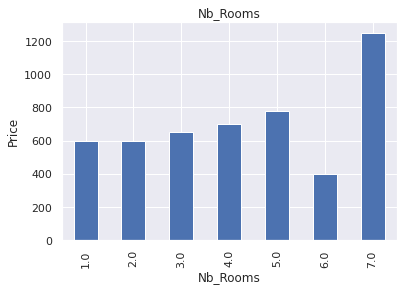

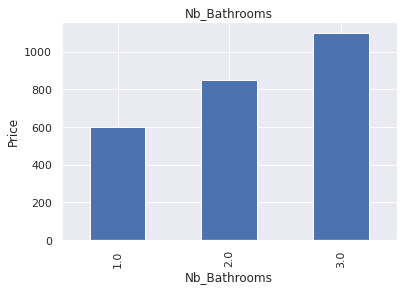

In [ ]:
## Lets Find the realtionship between them and Price

for feature in discrete_feature:
    data=df_train.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 2
['Size', 'Price']


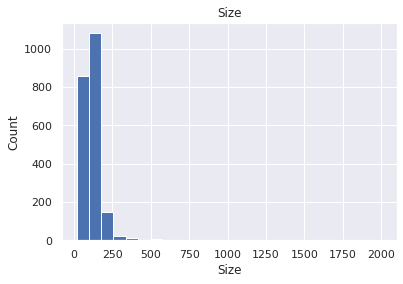

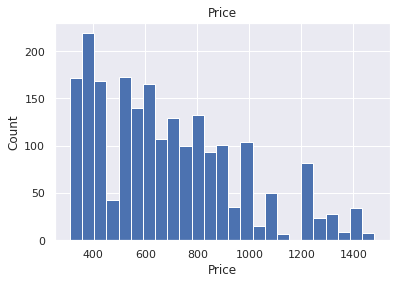

In [ ]:
for feature in continuous_feature:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

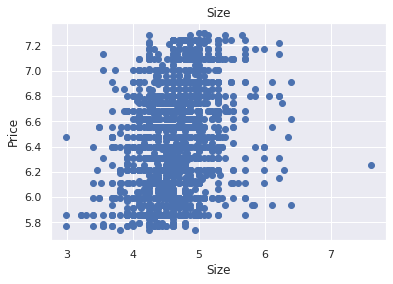

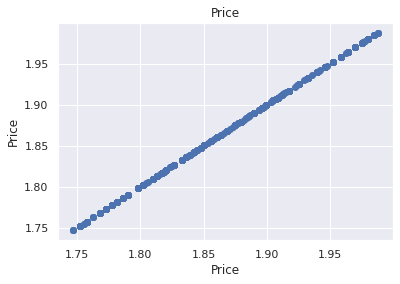

In [ ]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()
        

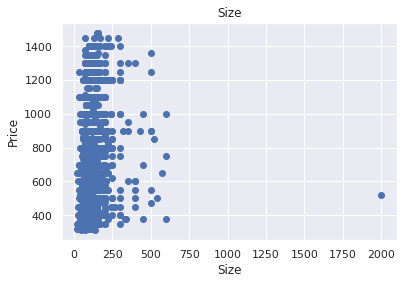

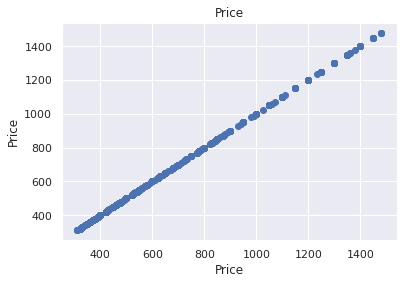

In [ ]:
for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

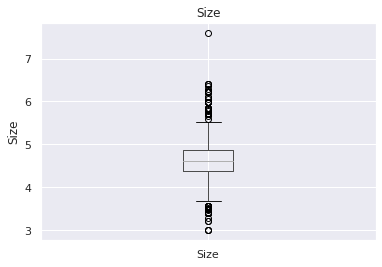

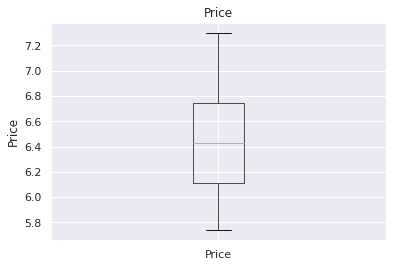

In [ ]:
for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [ ]:
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
categorical_features

['Type', 'Governorate', 'City']

In [ ]:
# In order to encode the categorical variables 
df_test.set_index(df_test.index+len(df_train),inplace=True)
df = df_train.append(df_test)

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is Type and number of categories are 2
The feature is Governorate and number of categories are 22
The feature is City and number of categories are 122


In [ ]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [ ]:
df.head(5)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,1,15,47,110.0,3.0,1.0,580.0
1,7628,1,19,98,40.0,1.0,1.0,650.0
2,10843,1,20,76,75.0,1.0,1.0,570.0
3,9401,1,16,68,55.0,2.0,1.0,350.0
4,10911,1,19,91,140.0,2.0,1.0,550.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


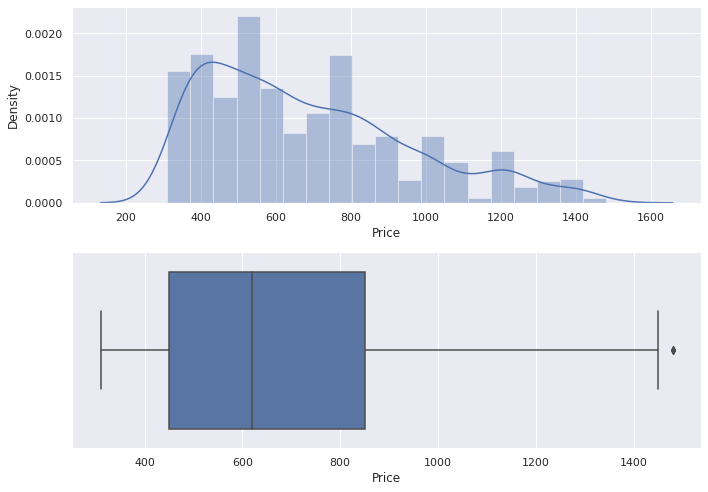

In [ ]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['Price'])
plt.tight_layout()

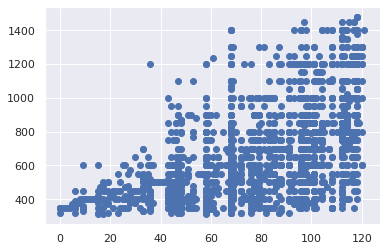

In [ ]:
plt.scatter(df['City'],df['Price'])

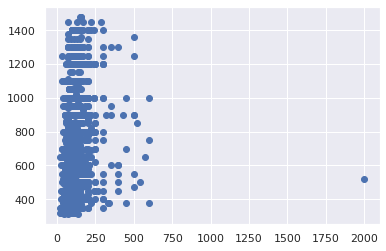

In [ ]:
plt.scatter(df['Size'],df['Price'])

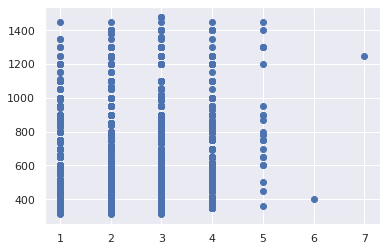

In [ ]:
plt.scatter(df['Nb_Rooms'],df['Price'])

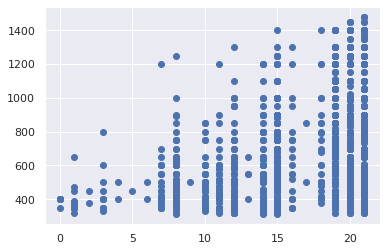

In [ ]:
plt.scatter(df['Governorate'],df['Price'])

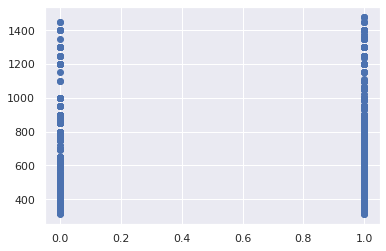

In [ ]:
plt.scatter(df['Type'],df['Price'])

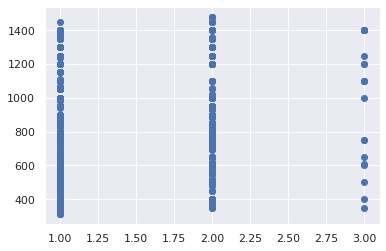

In [ ]:
plt.scatter(df['Nb_Bathrooms'],df['Price'])

In [ ]:
# Get back to train and test data, after being encoded by "get_dummies"
df_train = df[:len(df_train)].copy()
df_test = df[len(df_train):len(df)].copy()
df_test.drop(columns=['Price'], inplace=True)
df_test.reset_index(drop=True, inplace=True)
display(df_train)
display(df_test)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,1,15,47,110.0,3.0,1.0,580.0
1,7628,1,19,98,40.0,1.0,1.0,650.0
2,10843,1,20,76,75.0,1.0,1.0,570.0
3,9401,1,16,68,55.0,2.0,1.0,350.0
4,10911,1,19,91,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...,...
2134,11994,0,8,31,90.0,2.0,1.0,400.0
2135,11113,1,14,68,60.0,1.0,1.0,350.0
2136,7148,1,21,79,70.0,2.0,1.0,350.0
2137,12143,0,21,104,130.0,2.0,2.0,700.0


,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,10419,0,8,68,280.0,8.0,2.0
1,1118,1,21,112,150.0,3.0,1.0
2,2028,1,19,68,120.0,2.0,1.0
3,8331,1,19,101,160.0,3.0,2.0
4,5371,1,19,101,90.0,2.0,1.0
...,...,...,...,...,...,...,...
530,1586,1,15,85,130.0,4.0,1.0
531,3056,1,21,104,70.0,1.0,1.0
532,11645,0,20,107,200.0,4.0,3.0
533,6562,1,21,68,70.0,2.0,1.0


In [ ]:
cols = ['Price','Size', 'Nb_Rooms', 'Nb_Bathrooms'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df_train[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df_train[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df_train[cols] < (Q1 - 1.5 * IQR)) | (df_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = df_train[condition]

In [ ]:
scaling_feature=[feature for feature in filtered_df.columns if feature not in ['Id','Price'] ]
len(scaling_feature)

6

In [ ]:
scaling_feature

['Type', 'Governorate', 'City', 'Size', 'Nb_Rooms', 'Nb_Bathrooms']

In [ ]:
filtered_df.head()

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,1,15,47,110.0,3.0,1.0,580.0
1,7628,1,19,98,40.0,1.0,1.0,650.0
2,10843,1,20,76,75.0,1.0,1.0,570.0
3,9401,1,16,68,55.0,2.0,1.0,350.0
4,10911,1,19,91,140.0,2.0,1.0,550.0


In [ ]:
feature_scale=[feature for feature in filtered_df.columns if feature not in ['Id','Price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(filtered_df[feature_scale])

MinMaxScaler()

In [ ]:
scaler.transform(filtered_df[feature_scale])

array([[1.        , 0.71428571, 0.38842975, 0.48648649, 0.66666667,
        0.        ],
       [1.        , 0.9047619 , 0.80991736, 0.10810811, 0.        ,
        0.        ],
       [1.        , 0.95238095, 0.62809917, 0.2972973 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.38095238, 0.25619835, 0.37837838, 0.33333333,
        0.        ],
       [1.        , 0.66666667, 0.56198347, 0.21621622, 0.        ,
        0.        ],
       [1.        , 1.        , 0.65289256, 0.27027027, 0.33333333,
        0.        ]])

In [ ]:
filtered_df

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,1,15,47,110.0,3.0,1.0,580.0
1,7628,1,19,98,40.0,1.0,1.0,650.0
2,10843,1,20,76,75.0,1.0,1.0,570.0
3,9401,1,16,68,55.0,2.0,1.0,350.0
4,10911,1,19,91,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...,...
2131,2794,1,20,117,75.0,3.0,1.0,780.0
2133,4881,1,8,45,110.0,3.0,1.0,500.0
2134,11994,0,8,31,90.0,2.0,1.0,400.0
2135,11113,1,14,68,60.0,1.0,1.0,350.0


In [ ]:
filtered_df.isnull().sum()

Id              0
Type            0
Governorate     0
City            0
Size            0
Nb_Rooms        0
Nb_Bathrooms    0
Price           0
dtype: int64

In [ ]:
# Create input X and output y datasets for training and test
# Don't forget to drop 'Id' column (it is not a feature!)
X_train = filtered_df.drop(['Id','Price'],axis=1)
y_train = filtered_df['Price']
X_test = df_test.drop(['Id'],axis=1)
display(X_train)
display(y_train)
display(X_test)

,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,1,15,47,110.0,3.0,1.0
1,1,19,98,40.0,1.0,1.0
2,1,20,76,75.0,1.0,1.0
3,1,16,68,55.0,2.0,1.0
4,1,19,91,140.0,2.0,1.0
...,...,...,...,...,...,...
2131,1,20,117,75.0,3.0,1.0
2133,1,8,45,110.0,3.0,1.0
2134,0,8,31,90.0,2.0,1.0
2135,1,14,68,60.0,1.0,1.0


0       580.0
1       650.0
2       570.0
3       350.0
4       550.0
        ...  
2131    780.0
2133    500.0
2134    400.0
2135    350.0
2136    350.0
Name: Price, Length: 1759, dtype: float64

,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,0,8,68,280.0,8.0,2.0
1,1,21,112,150.0,3.0,1.0
2,1,19,68,120.0,2.0,1.0
3,1,19,101,160.0,3.0,2.0
4,1,19,101,90.0,2.0,1.0
...,...,...,...,...,...,...
530,1,15,85,130.0,4.0,1.0
531,1,21,104,70.0,1.0,1.0
532,0,20,107,200.0,4.0,3.0
533,1,21,68,70.0,2.0,1.0


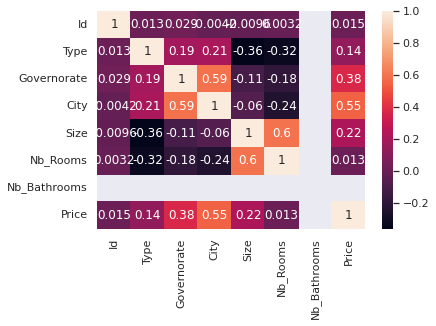

In [ ]:
sns.heatmap(filtered_df.corr(),annot=True)

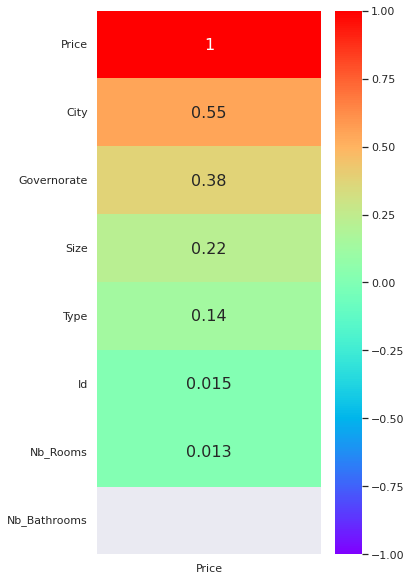

In [ ]:
top_features = filtered_df.corr()[['Price']].sort_values(by=['Price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=101)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=101))

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True, False])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 6
selected features: 5


In [ ]:
selected_feat

Index(['Type', 'Governorate', 'City', 'Size', 'Nb_Rooms'], dtype='object')

In [ ]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, y_train, test_size=0.1, random_state=101)